### Загрузка данных

In [ ]:
import tensorflow_datasets as tfds  # наборы данных TensorFlow

# Датасет содержит тексты новостей и их категории (4 класса)
(ds_train, ds_test), ds_info = tfds.load(
    'ag_news_subset',  # название датасета
    split = ['train', 'test'],  # разделяем на обучающую и тестовую выборку
    shuffle_files = True,  # случайный порядок данных
    as_supervised = True,  # элементы датасета будут кортежами (input, label)
    # input - текст новости
    # label - тип категории
    with_info = True  # для получения информации о датасете - ds_info
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.URUZL7_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.URUZL7_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


In [ ]:
len(ds_train)

120000

In [ ]:
len(ds_test)

7600

In [ ]:
num_classes = ds_info.features['label'].num_classes
print(f'Классов: {num_classes}')

print()

class_names = ds_info.features['label'].names
for item in enumerate(class_names):
    print(item)

Классов: 4

(0, 'World')
(1, 'Sports')
(2, 'Business')
(3, 'Sci/Tech')


##### Исходный формат данных

In [ ]:
for item in ds_train.take(5):
    print(item)

print()

for item in ds_test.take(5):
    print(item)

(<tf.Tensor: shape=(), dtype=string, numpy=b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Britain will run out of leading scientists unless science education is improved, says Professor Colin

##### Преобразуем в списки для удобства

In [ ]:
train_inputs, train_labels = [], []

# Обучающая выборка
for input, label in tfds.as_numpy(ds_train):
    # tfds.as_numpy(ds_train) - преобразуем тензоры в numpy объекты
    train_inputs.append(input.decode('utf-8'))  # байтовые строки (bytes) приводим к обычным строкам (str)
    train_labels.append(label)

In [ ]:
train_inputs[:5]

['AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.',
 'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.',
 'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.',
 'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.',
 'London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.']

In [ ]:
train_labels[:5]

[np.int64(3), np.int64(1), np.int64(2), np.int64(3), np.int64(1)]

In [ ]:
test_inputs, test_labels = [], []

# Тестовая выборка
for input, label in tfds.as_numpy(ds_test):
    test_inputs.append(input.decode('utf-8'))
    test_labels.append(label)

In [ ]:
test_inputs[:5]

[' CHARLOTTE, N.C. (Sports Network) - Carolina Panthers  running back Stephen Davis will miss the remainder of the  season after being placed on injured reserve Saturday.',
 ' PRESENTACION, Philippines (Reuters) - Philippine communist  rebels freed Wednesday two soldiers they had held as "prisoners  of war" for more than five months, saying they wanted to  rebuild confidence in peace talks with the government.',
 'SAN FRANCISCO, CA - November 30, 2004 -Ubisoft, one of the world #39;s largest video game publishers, today announced its plans to launch the next installment in the Tom Clancy #39;s Rainbow SixR franchise for the Sony PlayStationR2 computer entertainment system ',
 'DANIEL VETTORI spun New Zealand to the brink of a crushing victory over Bangladesh in the second and final Test at the MA Aziz Stadium in Chittagong today.',
 "AFP - Georgian and South Ossetian forces overnight accused each other of trying to storm the other side's positions in Georgia's breakaway region of South

In [ ]:
test_labels[:5]

[np.int64(1), np.int64(0), np.int64(3), np.int64(1), np.int64(0)]

### Токенизация и подготовка входных данных

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 20000  # размер словаря (наиболее часто встречающиеся слова)
max_len = 100  # максимальная длина последовательности слов

# Создание токенизатора (для преобразования текста в последовательности чисел)
tokenizer = Tokenizer(num_words = max_words, oov_token = "<OOV>")
# oov_token - все слова, которых нет в словаре будут заменены на спец. токен <OOV>

# Обучаем токенизатор
tokenizer.fit_on_texts(train_inputs)

# Выводим первые 5 элементов словаря
list(tokenizer.word_index.items())[:5]

[('<OOV>', 1), ('the', 2), ('a', 3), ('to', 4), ('of', 5)]

In [ ]:
# Преобразуем train_inputs и test_inputs в последовательности чисел
X_train = tokenizer.texts_to_sequences(train_inputs)
X_test = tokenizer.texts_to_sequences(test_inputs)

In [ ]:
# Демонстрация работы tokenizer.texts_to_sequences

print(train_inputs[0])

print()

d = {}  # всопомогательный словарь для примера
for key in tokenizer.word_index:
    d[tokenizer.word_index[key]] = key

print([d[key] for key in X_train[0]])

AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.

['amd', '39', 's', 'new', 'dual', 'core', 'opteron', 'chip', 'is', 'designed', 'mainly', 'for', 'corporate', 'computing', 'applications', 'including', 'databases', 'web', 'services', 'and', 'financial', 'transactions']


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Все последовательности (тексты) приводятся к одной длине
# Паддинг - дополнение нулями с начала
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

X_train
# получаем массивы, где каждая строка это вектор

array([[   0,    0,    0, ...,    7,  351, 6186],
       [   0,    0,    0, ...,  605,   45,  103],
       [   0,    0,    0, ...,  133,  384,  253],
       ...,
       [   0,    0,    0, ..., 3254, 2155, 1858],
       [   0,    0,    0, ..., 2962, 2248,  657],
       [   0,    0,    0, ...,    4,  825,  465]], dtype=int32)

In [ ]:
from tensorflow import keras

# Преобразование меток в one-hot векторы (это нужно для многоклассовой классификации)
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### Построение и обучение базовой модели (LSTM)

##### Создание модели

In [ ]:
from tensorflow.keras import layers

model_lstm = keras.Sequential([  # Линейная последовательность слоев
    layers.Embedding(max_words, 128, input_length = max_len),
    # embedding — слой, который преобразует целочисленные индексы слов в плотные векторы фиксированной размерности
    # max_words - размер словаря
    # 128 - размерность выходного вектора для каждого слова (размер embedding)
    # input_length - длина входной последовательности

    layers.LSTM(64),
    # LSTM - слой долгой краткосрочной памяти (Long Short-Term Memory)
    # 64 - количество нейронов в LSTM слое

    layers.Dense(num_classes, activation = 'softmax')
    # Dense - полносвязный слой
    # activation = 'softmax' - функция активации
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##### Компиляция модели

In [ ]:
model_lstm.compile(loss = 'categorical_crossentropy',  # функция потерь для многоклассовой классификации
                   optimizer = 'adam',
                   metrics = ['accuracy'])

##### Обучение модели

In [ ]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs = 5,  # количество эпох обучения
    batch_size = 128,
    validation_split = 0.1  # 10 процентов обучающих данных будут использоваться для валидации
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7864 - loss: 0.5787 - val_accuracy: 0.9093 - val_loss: 0.2786
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9315 - loss: 0.2084 - val_accuracy: 0.9072 - val_loss: 0.2770
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9469 - loss: 0.1570 - val_accuracy: 0.9048 - val_loss: 0.2921
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9597 - loss: 0.1190 - val_accuracy: 0.8988 - val_loss: 0.3329
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9682 - loss: 0.0935 - val_accuracy: 0.8963 - val_loss: 0.3604


### Модель с использованием предобученных эмбеддингов (LSTM + Glove)

##### Загрузка GloVe-эмбеддингов

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-05-18 04:47:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-18 04:47:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-18 04:47:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip -q glove.6B.zip

In [ ]:
import numpy as np

embedding_index = {}
# glove.6B.100d.txt содержит предобученные векторые представления слов размерности 100

with open('glove.6B.100d.txt', encoding = 'utf-8') as f:
    for line in f:
        values = line.split()  # values[0] - слово, values[1:] - числа (координаты вектора)
        word = values[0]
        coefs = np.asarray(values[1:], dtype = 'float32')
        embedding_index[word] = coefs  # key - слово, value - его вектор

##### Создание embedding_matrix

In [ ]:
embedding_dim = 100  # размерность векторов
embedding_matrix = np.zeros((max_words, embedding_dim))
# строки - слова
# столбцы - координаты вектора

for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)  # получаем векторы для слов
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

embedding_matrix
# Матрица, где каждая строка - вектор слова из словаря (или нули, если слова нет в GloVe)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 0.42961001, -0.23515999, -0.36998001, ...,  0.38393   ,
         0.08852   ,  0.54048997],
       [ 0.17844   ,  0.10027   ,  0.74033999, ...,  0.16007   ,
        -0.2507    ,  0.27063   ],
       [-0.22968   ,  0.80048001, -0.35334   , ...,  0.48032999,
         0.76251   , -0.48241001]])

##### Создание модели

In [ ]:
model_glove = keras.Sequential([
    layers.Embedding(max_words, embedding_dim, input_length = max_len, weights = [embedding_matrix], trainable = False),
    # weights=[embedding_matrix] - веса слоя матрицы эмбеддингов
    # trainable=False - эмбеддинги не изменяются во время обучения (заморожены)

    layers.Bidirectional(layers.LSTM(64)),
    # Двунаправленный LSTM (64 нейрона)

    layers.Dense(num_classes, activation = 'softmax')
])

##### Компиляция модели

In [ ]:
model_glove.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

##### Обучение модели

In [ ]:
history_glove = model_glove.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8274 - loss: 0.4954 - val_accuracy: 0.8910 - val_loss: 0.3055
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8955 - loss: 0.2970 - val_accuracy: 0.9028 - val_loss: 0.2771
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9061 - loss: 0.2656 - val_accuracy: 0.9076 - val_loss: 0.2677
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9125 - loss: 0.2472 - val_accuracy: 0.9061 - val_loss: 0.2635
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9188 - loss: 0.2299 - val_accuracy: 0.9153 - val_loss: 0.2461


### Оценка моделей LSTM, LSTM + Glove

In [ ]:
# LSTM
loss, acc = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {acc:.4f}")

# GloVe
loss, acc = model_glove.evaluate(X_test, y_test)
print(f"GloVe+LSTM Accuracy: {acc:.4f}")

# Сохраняем модели
model_lstm.export('model_lstm_savedmodel')
model_glove.export('model_glove_savedmodel')

# Структура папки model_lstm_savedmodel и model_glove_savedmodel
    # assets - доп. файлы
    # variables/variables.data-... - веса модели
    # variables/variables.index - индексный файл (для загрузки весов)
    # fingerprint.pb - информация о версии и конфигурации модели
    # saved_model.pb - граф вычислений модели (архитектура модели и операции, которые она выполняет)

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8998 - loss: 0.3513
LSTM Accuracy: 0.8991
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9146 - loss: 0.2567
GloVe+LSTM Accuracy: 0.9133
Saved artifact at 'model_lstm_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133232610686736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133232610687120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133232610685008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133232610687696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133232610688080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133232610688848: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at 'model_glove_savedmodel'. The following endpoints are available:

* Endpoint 'ser

##### Графики потерь / точности

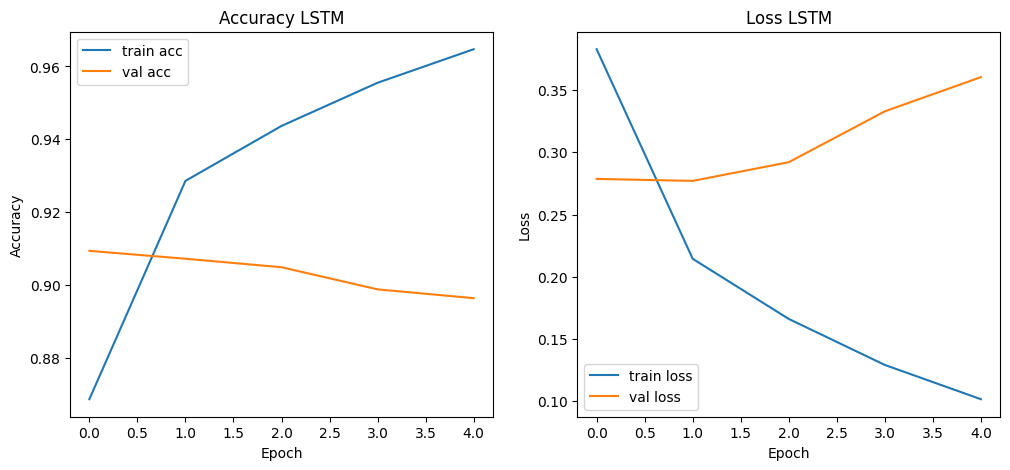

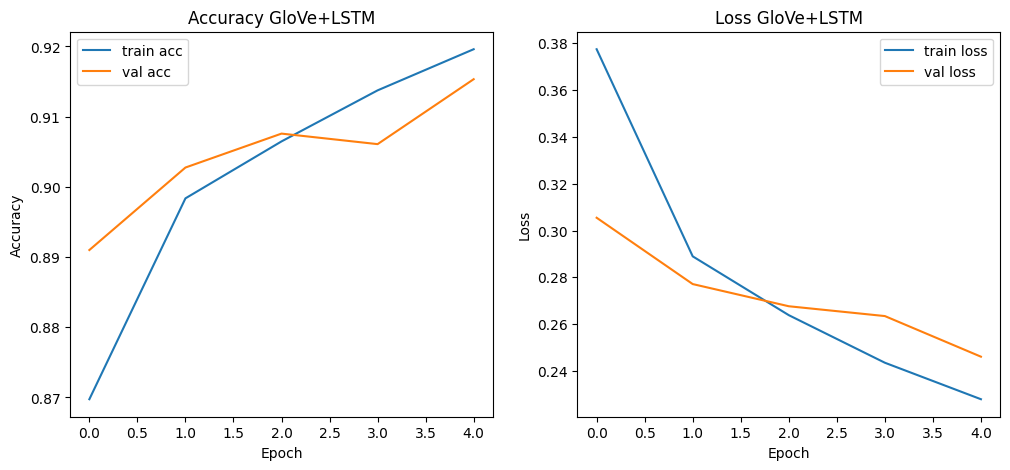

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title=''):
    plt.figure(figsize=(12,5))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'Accuracy {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'Loss {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Для LSTM
plot_history(history_lstm, title='LSTM')

# Для GloVe+LSTM
plot_history(history_glove, title='GloVe+LSTM')

### Сохраним нужные файлы для streamlit-app

In [ ]:
# Сохранение модели LSTM + GloVe в формате .h5
model_glove.save('model_glove_lstm.h5')
print("Модель успешно сохранена в формате H5: model_glove_lstm.h5")

Модель успешно сохранена в формате H5: model_glove_lstm.h5


In [ ]:
import pickle

# Сохраняем токенизатор в файл
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Токенизатор успешно сохранён в tokenizer.pkl")

Токенизатор успешно сохранён в tokenizer.pkl


In [ ]:
with open('tokenizer.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)

# Проверка: преобразуем текст в последовательность
test_text = ["Hello, World!"]
sequences = loaded_tokenizer.texts_to_sequences(test_text)
print(sequences)

[[1, 56]]
